In [320]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
data = pd.read_csv('/home/ganesh/SYDE675 Dataset/SYDE675AssignmentG11/MCI_2014_to_2017.csv')
df = pd.DataFrame(data)
df.shape

(131073, 29)

In [23]:
df = df.drop_duplicates(subset='event_unique_id',keep='first')
df.shape

(113908, 29)

In [24]:
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'FID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
df_dropped = df.drop(columns=drop_colmns)

In [25]:
df_grouped = df_dropped.groupby(df_dropped['occurrenceyear'])

In [26]:
df_2016 = df_grouped.get_group(2016)

In [82]:
df_2016_grouped = df_2016.groupby(df_2016['MCI']).count()

In [83]:
plot = df_2016_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']

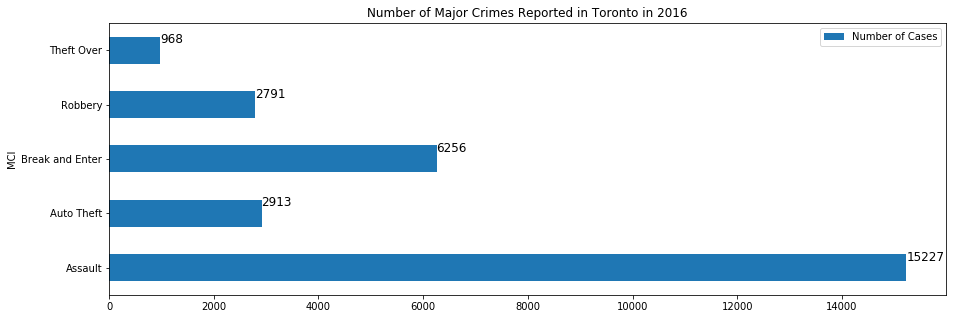

In [84]:
totals = []
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2016')
for i in ax.patches:
    ax.text(i.get_width()+0.3,i.get_y()+0.38,\
            str(round((i.get_width()),2)),fontsize=12,color='black')  

# K-MEANS CLUSTERING

In [187]:
df_g = df_2016.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g
df_g = df_g.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g = df_g.dropna()

In [188]:
scaler = StandardScaler()

In [203]:
std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

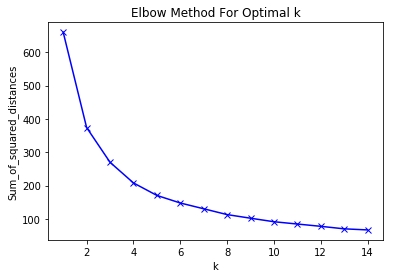

In [204]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [350]:
kmeans = KMeans(n_clusters=3)

In [351]:
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)

cov = np.cov(df_transformed.T)
eig,eigvec = np.linalg.eig(cov)
print(eig)
X

[3.48805522 0.77520119 0.10208788 0.18977745 0.4830462 ]


array([[-4.37116838e-01, -5.59260518e-02, -3.36352618e-01],
       [ 5.25025758e-01,  2.20104440e-01, -5.20739030e-01],
       [-9.51861392e-01,  2.80876486e-01, -3.83536242e-01],
       [ 3.72824842e+00, -1.11555762e+00, -1.21009113e+00],
       [-4.29313887e-01, -2.46899721e-01, -6.86082594e-01],
       [-3.38341430e-01,  3.50884693e-01, -2.42532772e-01],
       [ 4.23127927e+00, -1.13893266e+00, -9.54047093e-01],
       [-8.40834547e-01,  6.18072195e-02, -2.86777511e-01],
       [ 9.11882718e-01,  6.75326503e-02, -1.58475345e+00],
       [-1.09947080e+00, -1.22295954e-01,  5.24517872e-01],
       [ 2.07715854e+00, -4.80346200e-02,  6.24769467e-01],
       [ 4.67059262e-01, -5.32460479e-01, -3.73130339e-01],
       [ 8.94451275e-01,  6.00469516e-01,  1.26965515e+00],
       [-1.64992165e+00, -1.95806063e-01,  1.69582571e-01],
       [-6.20884913e-02, -6.25102918e-02,  7.51596435e-01],
       [-1.31329328e+00, -8.69982050e-02, -7.67095211e-01],
       [-1.74019736e+00,  5.28538420e-02

In [352]:
kc =kmeans.fit(X)

label = pd.DataFrame(kc.labels_)
df_result =pd.DataFrame(X)
df_result

,0,1,2
0,-0.437117,-0.055926,-0.336353
1,0.525026,0.220104,-0.520739
2,-0.951861,0.280876,-0.383536
3,3.728248,-1.115558,-1.210091
4,-0.429314,-0.246900,-0.686083
5,-0.338341,0.350885,-0.242533
6,4.231279,-1.138933,-0.954047
7,-0.840835,0.061807,-0.286778
8,0.911883,0.067533,-1.584753
9,-1.099471,-0.122296,0.524518


In [353]:
df_result['label']=label
df_result

,0,1,2,label
0,-0.437117,-0.055926,-0.336353,0
1,0.525026,0.220104,-0.520739,2
2,-0.951861,0.280876,-0.383536,0
3,3.728248,-1.115558,-1.210091,1
4,-0.429314,-0.246900,-0.686083,0
5,-0.338341,0.350885,-0.242533,0
6,4.231279,-1.138933,-0.954047,1
7,-0.840835,0.061807,-0.286778,0
8,0.911883,0.067533,-1.584753,2
9,-1.099471,-0.122296,0.524518,0


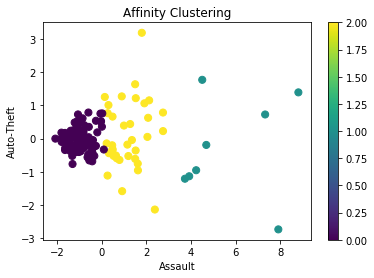

In [358]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_result[0],df_result[2],
                     c=label[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('Assault')
ax.set_ylabel('Auto-Theft')
plt.colorbar(scatter)

In [378]:
np.where(label[0]==1)

(array([  3,   6,  21,  54,  72, 114, 116, 130]),)

In [390]:
df_g.iloc[6,:]

MCI
Assault            395.0
Auto Theft          19.0
Break and Enter     87.0
Robbery             46.0
Theft Over          36.0
Name: Bay Street Corridor (76), dtype: float64